<a href="https://colab.research.google.com/github/shanewcoleman/algo_practice/blob/master/chatgptpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGPT Part 1
## Large Language Models in SAS
### How do they work
#### From scratch, first half primer, Zero to Hero, in ten minutes flat


## A _model_ is just a fancy word for a formula that tries to guesstimate a number

### Start with an equation that determines another number from a first number, like

### HEIGHT=3 times WEIGHT

### Which is guessingtimating the number of inches tall someone is the number of pounds they weight

Or all mathy

$$
WEIGHT = f(HEIGHT) = 3HEIGHT
$$

Poof it is a model

## How many math will be needed?

If you can take the derivate or
$$
x^2
$$
is
$$
2x
$$
you have all the math you need to program chatgpt

Proof
$$
\begin{aligned}
f(x) &= x^2 \\
f'(x) &= lim_{\Delta x \to 0}\frac{f(x+\Delta x)-f(x)}{(x+\Delta x) - x} \\
 &= lim_{\Delta x \to 0}\frac{(x+\Delta x)^2-(x)^2}{\Delta x} \\
 &= lim_{\Delta x \to 0}\frac{x^2+2x\Delta x + (\Delta x)^2 - x^2}{\Delta x} \\
 &= lim_{\Delta x \to 0}\frac{2x\Delta x + (\Delta x)^2}{\Delta x} \\
 &= lim_{\Delta x \to 0}\frac{\Delta x(2x + \Delta x}{\Delta x} \\
 &= lim_{\Delta x \to 0} 2x + \Delta x \\
 &= 2x+0 \\
 &= 2x \\
\end{aligned}
$$

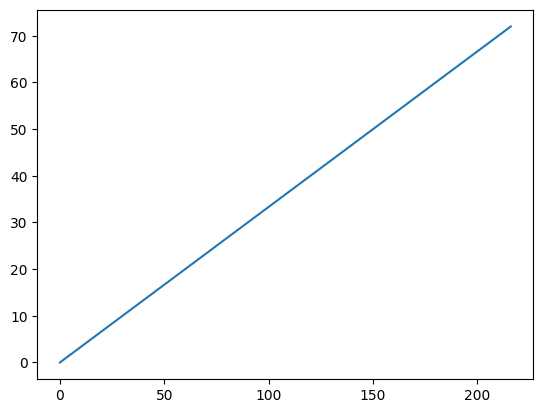

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
height = np.array([0,72])
weight = 3 * height
plt.plot(weight, height)
plt.show()

Make it a curve
$$
y=x^2
$$

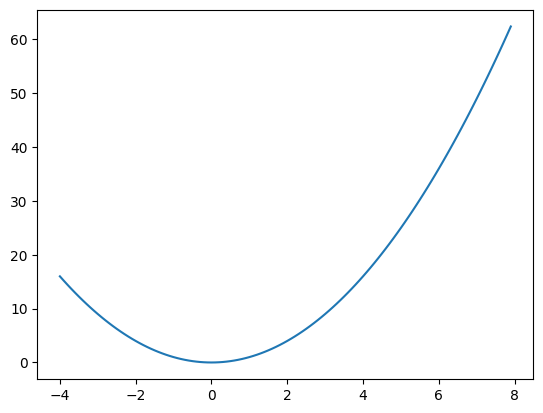

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-4,8,.1)
y = np.square(x)
plt.plot(x,y);
plt.show()


Instead of
$$
y=x^2
$$
make it
$$
y=2^x
$$
and then divide it by itself plus one
$$
y=\frac{2^x}{2^x+1}
$$


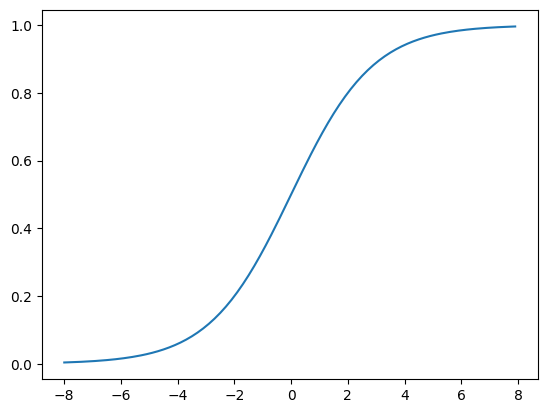

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-8,8,.1)
y = (2**x)/(2**x+1)
plt.plot(x,y);
plt.show()


Instead of
$$
2^x
$$
use
$$
2.7182818^x = e^x
$$
Start with a neural network, using the formula for a curve, this is the sigmoid, $\sigma$, used in logistic regression (originally used to calculated the population of Paris!)
$$
y = \sigma(x) = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}
$$
and multiply input $x$ times a weight and a bias, put the result as the curve function input, then multiply output times another weight and bias coming out
$$
y = w_2 \cdot \sigma(w_1 x + b_1) + b_2
$$

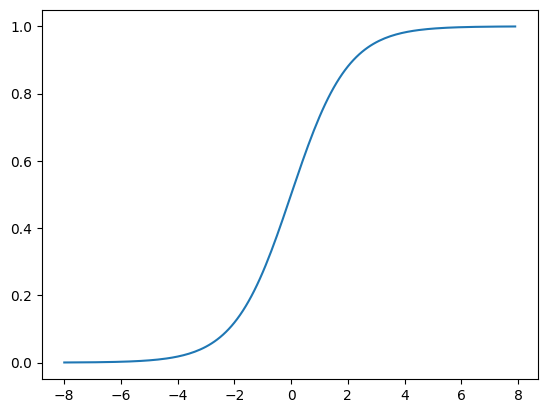

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-8,8,.1)
y = 1/(1+np.exp(-x))
plt.plot(x,y);
plt.show()

Take another curve and scale it and shift it, multiplying it by different weight and bias numbers

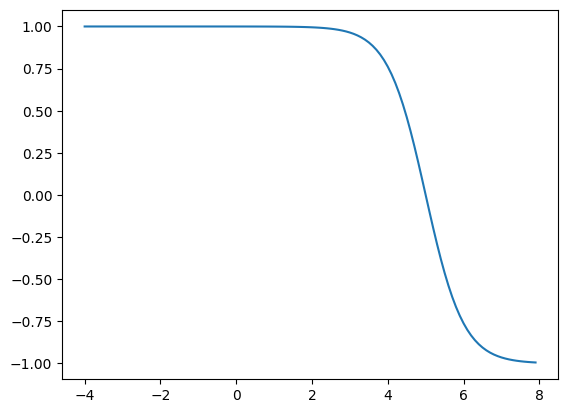

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-4,8,.1)
l1 = 1/(1+np.exp(-2*x))
y1 = l1 *2 - 1
l2 = 1/(1+np.exp(-(2*x-10)))
y2 = l2 * (-2) + 1
plt.plot(x,y2)
plt.show()


Now add the two curves together


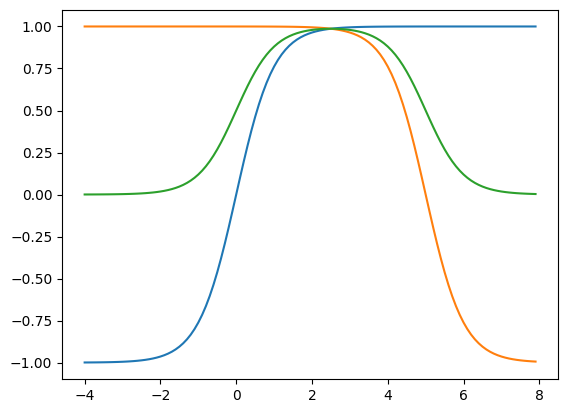

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-4,8,.1)
l1 = 1/(1+np.exp(-2*x))
y1 = l1 *2 - 1
l2 = 1/(1+np.exp(-(2*x-10)))
y2 = l2 * (-2) + 1
y3 = 0.5 * (y1 + y2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

# Now how do we find the equation of this curve?

# Gradient Descent

### Idea: little steps along the downward slope

## Example

Fit a linear regression using gradient descent

### Closed form solution

$$
\hat{\beta} = (x'x)^{-1}x'y
$$

### With gradient descent

Make an initial estimate using random numbers

$$
\hat{\beta} = \text{random}
$$

for the equation

$$
\hat{y} = m x + b
$$

Plug in $\hat{y}=mx+b$

Find the errr

$$
e = (y-\hat{y})^2  
$$

Now make little increment to $m$ and $b$ based on the slope, with $\alpha$ as a small learning rate to make small increments and not overshoot the solution

$$
m = m - \alpha \frac{\partial e}{\partial m}
$$

But the slope of $\frac{\partial e}{\partial m}$ is unknown, so calculate it using the chain rule, starting from the $\hat{y}$ for the error, and then how $m$ contributed to $\hat{y}$

$$
\begin{aligned}
\text{error} \quad e &= (y-\hat{y})^2 \\
\hat{y} &= mx+b \\
\frac{\partial e}{\partial \hat{y}} &= (2)(y-\hat{y})(-1) \\
\frac{\partial \hat{y}}{\partial m} &= x \\
\frac{\partial \hat{y}}{\partial b} &= 1 \\
\implies \frac{\partial e}{\partial m}  &=  \frac{\partial e}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial m} \\
\implies \frac{\partial e}{\partial m} &= \frac{\partial e}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial b} \\
\end{aligned}
$$



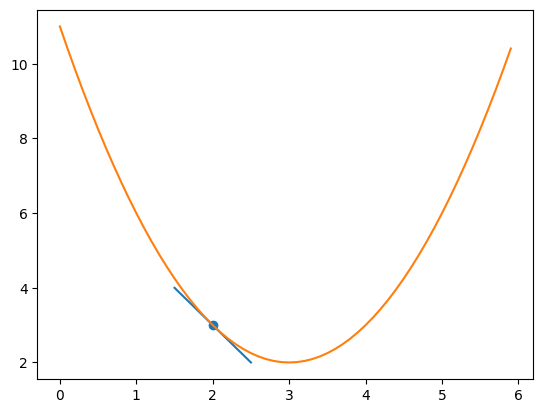

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x2 = 2;
y2 = (x2-3)**2 + 2;
plt.scatter(x2,y2)
m = (2) * (x2-3)
b = y2
xx = np.array([1.5,2.5])
yy = m*(xx-x2)+b
plt.plot(xx,yy)
x = np.arange(0,6,.1)
y = (x-3)**2 + 2
plt.plot(x,y)
plt.show()

## Here for a linear regression

Gradient Descent beta estimate beta=array([[-0.63552148],
       [ 1.48629918]])
Closed form solution betaclosed=array([[-0.66666667],
       [ 1.5       ]])


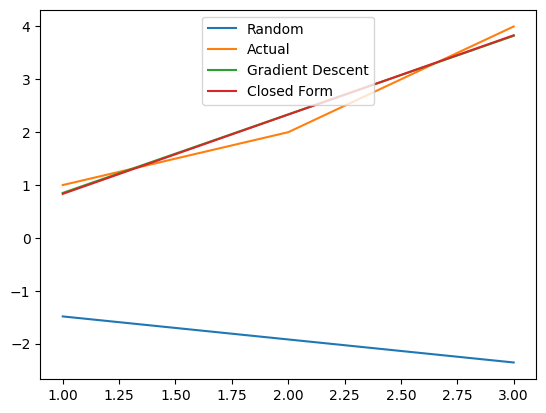

In [ ]:
# Solve linear regression gradient descent versus closed form
import matplotlib.pyplot as plt
import numpy as np
y = np.array([[1],[2],[4]]) # target = beta*x
x = np.array([1,2,3]) # can be multi-dimensional, still works
d = np.c_[np.ones(x.shape[0]), x] # add intercept column
beta = np.random.normal(0,1,(d.shape[1],1)) # initialize to random numbers
yhat = np.dot(d,beta)
plt.plot(x,yhat,label="Random")
plt.plot(x,y,label="Actual")
for i in range(350): # epochs, increase for more accuracy
    yhat = np.dot(d,beta) # estimate target
    residual = y - yhat # error residual
    pe = residual * (-2.) # partial of square error wrt yhat
    per = np.repeat(pe,d.shape[1],axis=1) # partial error repeated
    gradient = np.multiply(d,per) # gradient of beta per row
    gradsum = np.sum(gradient, axis=0)[:, np.newaxis] # cumulative
    beta = beta - .01 * gradsum # update beta
print(f'Gradient Descent beta estimate {beta=}')
betaclosed = np.dot(np.linalg.inv(np.dot(d.T, d)), np.dot(d.T, y))
print(f'Closed form solution {betaclosed=}')
plt.plot(x,yhat,label="Gradient Descent")
plt.plot(x,np.dot(d,betaclosed),label="Closed Form")
leg = plt.legend(loc='upper center')
plt.show()

# Feed Forward

## Exact same as linear regression

Use the chain rule to find the slope, and gradient descent to find the estimates

First, what is it was a single input, a single perceptron, and a single output

### Feed forward

$$
\begin{aligned}
y_1 &= w_1 x_1 + b_1 \\
y_2 &= \frac{1}{1+e^{-y_1}} & \text{activation is sigmoid } \sigma \\
y_3 &= w_2 y_2 + b_2 \\
\hat{y} &= \frac{1}{1+e^{-y_3}} & \text{output activation} \\
e &= (y - \hat{y})^2 & \text{error} \\
\end{aligned}
$$

### Back propagation of slope of error (loss function)

$$
\begin{aligned}
\frac{\partial e}{\partial \hat{y}} &= (2)(y-\hat{y})(-1) \\
\frac{\partial \hat{y}}{\partial y_3} &= \sigma(y_3)(1-\sigma(y_3)) \\
\frac{\partial y_3}{\partial w_2} &= y_2 \\
\frac{\partial y_3}{\partial b_2} &= 1 \\
\frac{\partial y_2}{\partial y_1} &= \sigma(y_3)(1-\sigma(y_3)) \\
\frac{\partial y_1}{\partial w_1} &= x_1 \\
\frac{\partial y_1}{\partial b_1} &= 1 \\
\end{aligned}
$$

## Applying this from scratch


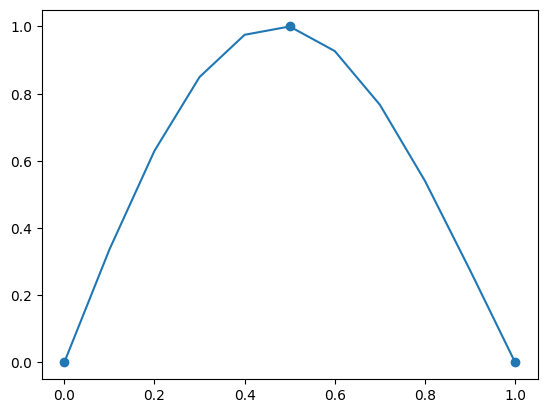

In [ ]:
# Solve linear regression gradient descent versus closed form
import matplotlib.pyplot as plt
import numpy as np
# activation function and derivative of a few common
def adtanh(xm):
  a = np.tanh(xp)
  d = 1-np.square(a)
  return a,d

def adsoftplus(xm):
  a = np.log(1+np.exp(xm))
  d = 1/(1+np.exp(-xm))
  return a,d

def adsigmoid(xm):
  a = 1/(1+np.exp(-xm))
  d = np.multiply(a,1-a)
  return a,d

x = np.array([ [0], [.5], [1 ]]) # use multi dim in case multiple inputs
y = np.array([ 0, 1, 0 ]) # and in case multiple outputs


nperceptron = 2
# weights and bias in and out
win = np.random.normal(0, 1, (x.shape[1],nperceptron))
bin = np.zeros((1,nperceptron))
wout = np.random.normal(0, 1, (nperceptron, 1))
bout = np.zeros((1, 1))

lr = .1

epochs = 50000
yest = np.zeros(x.shape[0])

for i in range(epochs):
    for j in range(x.shape[0]):
        y0 = x[j,]; #
        y1 = np.dot(y0,win) + bin # first layer weight and bias
        y2, dy2 = adsigmoid(y1) # activation function and partial derivative
        yhat = np.dot(y2,wout) + bout # next set of weights and biases
        err = np.square(y[j,] - yhat) # ssq loss function, SHAPE: [1,ncol(y)]
        yest[j,] = yhat
        yactual = y[j,]
        gerr = -2 * (yactual - yhat) # gradient of square error
        gbout = gerr # gradient output bias
        gwout =  np.dot(y2.T,gerr) # gradient output weight
        gyhat = gerr * wout.T  # gradient output wout+bout layer
        gy2 = gyhat * dy2 # gradient perceptron
        gbin = gy2 # gradient input bias
        gwin = np.dot(y0.T,gy2) # gradient input weight
        win = win - lr * gwin
        bin = bin - lr * gbin
        wout = wout - lr * gwout
        bout = bout - lr * gbout


plt.scatter(x.flatten(),y)
tx = np.arange(0,np.max(x)+.1, .1)
ty = np.zeros(len(tx))
for i in range(len(tx)):
   oi = np.dot(tx[i], win) + bin
   oi,_ = adsigmoid(oi)
   oi = np.dot(oi, wout) + bout
   ty[i] = oi;
plt.plot(tx,ty)
plt.show()


# Recurrent Neural Network

## Extending this to a time series

$$
y = f(x_{d}, x_{d-1}, x_{d-2}, \ldots, x_{d-n})
$$


<Figure size 640x480 with 0 Axes>

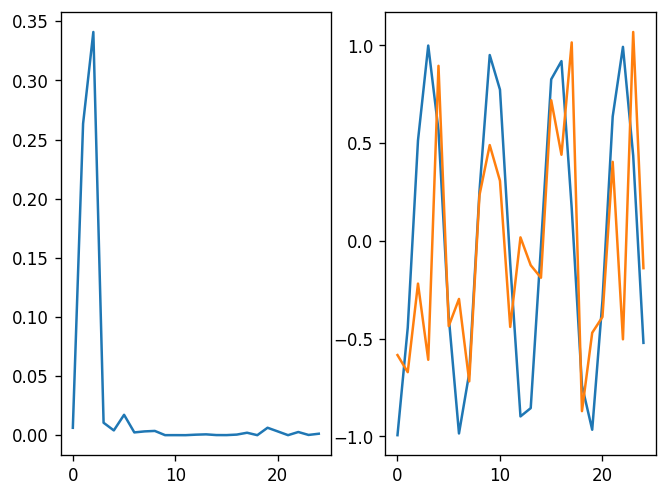

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def dataset(size=200, timesteps=25):
    x, y = [], []
    sin_wave = np.sin(np.arange(size))
    for step in range(sin_wave.shape[0] - timesteps):
        x.append(sin_wave[step:step + timesteps])
        y.append(sin_wave[step + timesteps])
    return np.array(x).reshape(len(y), timesteps, 1), np.array(y).reshape(len(y), 1)

class RNN:
    def __init__(self, x, y, hidden_units):
        self.x = x  # shape [samples, timesteps, features]
        self.y = y  # shape [samples, outputs]
        self.hidden_units = hidden_units
        self.Wx = np.random.randn(self.hidden_units, self.x.shape[2])
        self.Wh = np.random.randn(self.hidden_units, self.hidden_units)
        self.Wy = np.random.randn(self.y.shape[1], self.hidden_units)

    def cell(self, xt, ht_1, sample, step):
        a5 = np.dot(self.Wx, xt.reshape(1, 1)) + np.dot(self.Wh, ht_1)
        ht = np.tanh(a5)
        yt = np.dot(self.Wy, ht)
        return ht, yt



    def forward(self, sample):
        sample_x, sample_y = self.x[sample], self.y[sample]
        ht = np.zeros((self.hidden_units, 1))  # first hidden state is zeros vector
        self.hidden_states = [ht]  # collection of hidden states for each sample
        self.inputs = []  # collection of inputs for each sample
        for step in range(len(sample_x)):
            ht, yt = self.cell(sample_x[step], ht, sample, step)
            self.inputs.append(sample_x[step].reshape(1, 1))
            self.hidden_states.append(ht)
        self.error = yt - sample_y
        self.loss = 0.5 * self.error ** 2
        self.yt = yt

    def backward(self, epoch, sample):
        n = len(self.inputs)
        dyt = self.error  # dL/dyt
        dWy = np.dot(dyt, self.hidden_states[-1].T)  # dyt/dWy
        dht = np.dot(dyt, self.Wy).T  # dL/dht = dL/dyt * dyt/dht ,where ht = tanh(Wx*xt + Wh*ht))
        dWx = np.zeros(self.Wx.shape)
        dWh = np.zeros(self.Wh.shape)
        # BPTT
        for step in reversed(range(n)):
            temp = (1 - self.hidden_states[
                step + 1] ** 2) * dht  # dL/dtanh = dL/dyt * dyt/dht * dht/dtanh, where dtanh = (1-ht**2)
            dWx += np.dot(temp, self.inputs[step].T)  # dL/dWx = dL/dyt * dyt/dht * dht/dtanh * dtanh/dWx
            dWh += np.dot(temp, self.hidden_states[step].T)  # dL/dWh = dL/dyt * dyt/dht * dht/dtanh * dtanh/dWh
            dht = np.dot(self.Wh, temp)  # dL/dht-1 = dL/dht * (1 - ht+1^2) * Whh

        dWy = np.clip(dWy, -1, 1)
        dWx = np.clip(dWx, -1, 1)
        dWh = np.clip(dWh, -1, 1)
        self.Wy -= self.lr * dWy
        self.Wx -= self.lr * dWx
        self.Wh -= self.lr * dWh

    def train(self, epochs, learning_rate):
        self.Ovr_loss = []
        self.lr = learning_rate
        for epoch in range(epochs):
            for sample in range(self.x.shape[0]):
                self.forward(sample)
                self.backward(epoch, sample)
            self.Ovr_loss.append(np.squeeze(self.loss / self.x.shape[0]))
            self.loss = 0

    def test(self, x, y):
        self.x = x
        self.y = y
        self.outputs = []
        for sample in range(len(x)):
            self.forward(sample)
            self.outputs.append(self.yt)


x, y = dataset()
x_test, y_test = dataset(300)
x_test = x_test[250:]
y_test = y_test[250:]
rnn = RNN(x, y, 100)
rnn.train(25, 1e-2)
rnn.test(x_test, y_test)
plt.tight_layout()
plt.figure(dpi=120)
plt.subplot(121)
plt.plot(rnn.Ovr_loss)
plt.subplot(122)
pltarg1 = np.array([i for i in range(len(x_test))])
pltarg2 = y_test
pltarg3 = np.array(rnn.outputs).reshape(y_test.shape)
plt.plot( pltarg1, pltarg2, pltarg3)
plt.show()


# Activation Functions


| Name        | Function    | Derivative |
| ----------- | ----------- | ---- |
| Identity    | $f(x)=x$       | $f'(x)=1$ |
| Linear   | $f(x)=ax+b$        | $f'(x)=a$ |
| Sigmoid   | $f(x)=\frac{1}{1+e^{-x}}$        | $f'(x)=f(x)(1-f(x))$ |
| TanH     | $f(x)=\text{tanh}(x)=\frac{2}{1+e^{-2x}}-1$        | $f'(x)=1-f(x)^2$ |
| ReLU (Rectified Linear Unit)    | $f(x)=\begin{cases} 0 \text{ if }x<0 \\ x \text{ if }x\ge 0 \end{cases}$   | $f'(x)=\begin{cases} 0 \text{ if }x<0 \\ 1 \text{ if }x\ge 0 \end{cases}$ |
| Parametric ReLU    | $f(x)=\begin{cases} ax \text{ if }x<0 \\ x \text{ if }x\ge 0 \end{cases}$   | $f'(x)=\begin{cases} a \text{ if }x<0 \\ 1 \text{ if }x\ge 0 \end{cases}$ |
| Exponential LU     | $f(x)=\begin{cases} a(e^x-1) \text{ if }x<0 \\ x \text{ if }x\ge 0 \end{cases}$   | $f'(x)=\begin{cases} f(x)+a \text{ if }x<0 \\ 1 \text{ if }x\ge 0 \end{cases}$ |



## Activation functions tanh and sigmoid are both needed in long short term memory, and linear for weights, softmax later




### softmax

Softmax is a special cases where all other outputs have to be considered form the other perceptron as they all feed into the activation function

$$
S(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
$$

### softmax derivative

For back propagation

$$
\frac{\partial S(z_i)}{\partial z_j} =
\begin{cases}
S(z_i)(1-s(z_i)) & i=j \\
-S(z_i)(S(z_j)) & i \ne j
\end{cases}
$$

## derivative of cross entropy loss

Cross entropy formula and derivative with softmax preceding

$$
\begin{aligned}
L &= -y \cdot \log(\hat{y}) \\
L_i &= -y_i \log ( \hat{y}_i ) \\
L &= \sum_i -y_i \log ( \hat{y}_i ) \\
\frac{\partial L}{\partial l_n} &= -\sum_i y_i \cdot \frac{\partial \log(\hat{y}_i)}{\partial l_n} \\
&= -\sum_i y_i \cdot \frac{\partial \log(\hat{y}_i)}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial l_n}\\
&= -\sum_i y_i \cdot \frac{1}{\hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial l_n} \\
&= -\sum_i \frac{y_i}{\hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial l_n} \\
&= -\sum \frac{y_i}{\hat{y}_i} \cdot \begin{cases} \hat{y}_n(1-\hat{y}_n) \quad i=n \\ -\hat{y}_i \hat{y}_n \quad i \ne n \end{cases} \\
&= -\sum_{i=n} \frac{y_i}{\hat{y}_i} \cdot \hat{y}_i (1 - \hat{y}_i ) + \sum_{i \ne n} \frac{y_i}{\hat{y}_i} \cdot \hat{y}_i \hat{y}_n \\
&= -y_n+y_n\hat{y}_n + \sum_{i \ne n} y_i \hat{y}_n \\
& -y_n + y_n\hat{y}_n + \sum_i y_y \hat{y}_n \\
&= -y_n + 1 \cdot \hat{y}_n \\
&= \hat{y}_n - y_n \\
\end{aligned}
$$

## derivative of cross entropy loss

Cross entropy formula and derivative with softmax preceding

$$
\begin{aligned}
L &= -y \cdot \log(\hat{y}) \\
L_i &= -y_i \log ( \hat{y}_i ) \\
L &= \sum_i -y_i \log ( \hat{y}_i ) \\
\frac{\partial L}{\partial l_n} &= -\sum_i y_i \cdot \frac{\partial \log(\hat{y}_i)}{\partial l_n} \\
&= -\sum_i y_i \cdot \frac{\partial \log(\hat{y}_i)}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial l_n}\\
&= -\sum_i y_i \cdot \frac{1}{\hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial l_n} \\
&= -\sum_i \frac{y_i}{\hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial l_n} \\
&= -\sum \frac{y_i}{\hat{y}_i} \cdot \begin{cases} \hat{y}_n(1-\hat{y}_n) \quad i=n \\ -\hat{y}_i \hat{y}_n \quad i \ne n \end{cases} \\
&= -\sum_{i=n} \frac{y_i}{\hat{y}_i} \cdot \hat{y}_i (1 - \hat{y}_i ) + \sum_{i \ne n} \frac{y_i}{\hat{y}_i} \cdot \hat{y}_i \hat{y}_n \\
&= -y_n+y_n\hat{y}_n + \sum_{i \ne n} y_i \hat{y}_n \\
& -y_n + y_n\hat{y}_n + \sum_i y_y \hat{y}_n \\
&= -y_n + 1 \cdot \hat{y}_n \\
&= \hat{y}_n - y_n \\
\end{aligned}
$$

## Visualization of the different activation functions

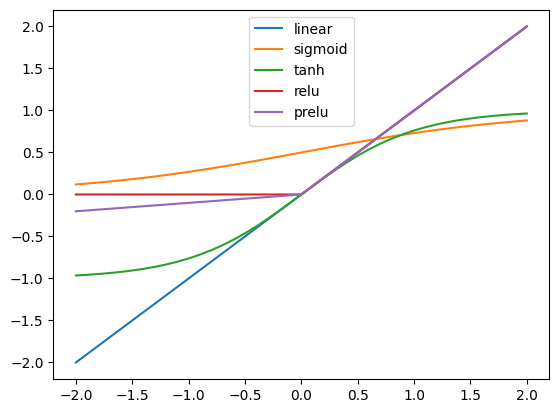

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-2,2+.1,.1)
nc = len(x)
alinear = x
asigmoid = 1/(1+np.exp(-x))
atanh = np.tanh(x)
arelu = np.where(x<0,0,x)
a = .1
aprelu = np.where(a*x>x,a*x,x)
plt.plot(x,alinear,label='linear')
plt.plot(x,asigmoid,label='sigmoid')
plt.plot(x,atanh,label='tanh')
plt.plot(x,arelu,label='relu')
plt.plot(x,aprelu,label='prelu')
leg = plt.legend(loc='upper center')
plt.show()

# LSTM
## Long Short Term Memory


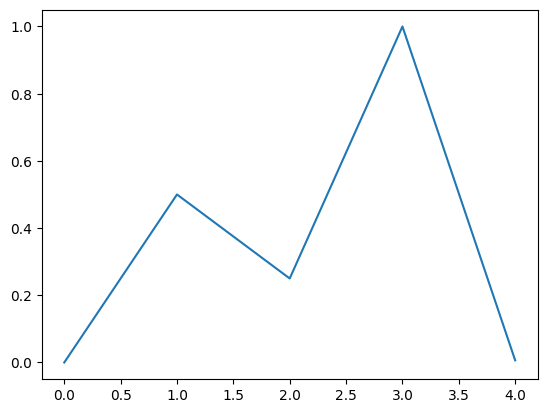

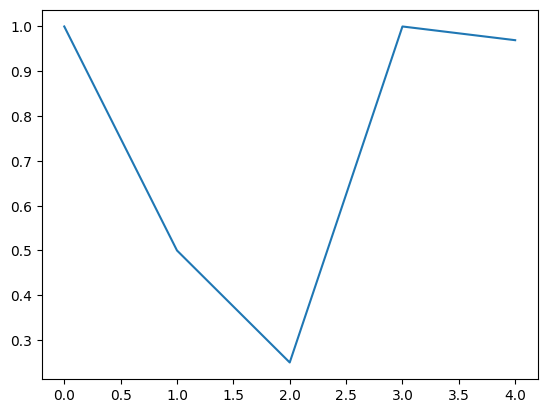

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(xx): return (1/(1+np.exp(-xx)))

def lstmpath(lst,inp):
    ltm = lst[0]; stm=lst[1];
    iw1 = 1.63; b1 = 1.62; sw1 = 2.70; # activation 1 sigmoid
    iw2 = 1.65; b2 = 0.62; sw2 = 2.00; # activation 2 sigmoid
    iw3 = 0.94; b3 = -0.32; sw3 = 1.41; # activation 3 tanh
    iw4 = -0.19; b4 = 0.59; sw4 = 4.38; # activation 4 sigmoid, 5 tanh
    y1 = np.dot(stm,sw1) + np.dot(inp,iw1) + b1; a1 = sigmoid(y1);
    ltm = np.dot(ltm,a1); # send long term memory through FORGET GATE
    # send long term through INPUT GATE
    y3 = np.dot(stm,sw3) + np.dot(inp,iw3) + b3;    a3 = np.tanh(y3);
    y2 = np.dot(stm,sw2) + np.dot(inp,iw2) + b2;    a2 = sigmoid(y2);
    prod = np.dot(a2,a3);    nextltm = ltm + prod;
    # send long term through OUTPUT GATE
    thltm = np.tanh(nextltm);    y4 = np.dot(stm,sw4) + np.dot(inp,iw4) + b4;
    a4 = sigmoid(y4);    nextstm = np.dot(a4,thltm);
    mtrx = np.array([nextltm,nextstm])
    return mtrx

def lstm(days):
    ltmstm = np.zeros(2)
    for i in range(len(days)):
        ltmstm = lstmpath(ltmstm,days[i])

    rv = ltmstm[1]
    xx = np.arange(5)
    yy = np.append(days,rv)
    plt.plot(xx, yy)
    return rv

ca=np.array([0, .5, .25, 1])
cav=lstm(ca)
plt.show()
cb=np.array([1, .5, .25, 1])
cbv=lstm(cb)
plt.show()

# Stochastic Gradienbt Descent

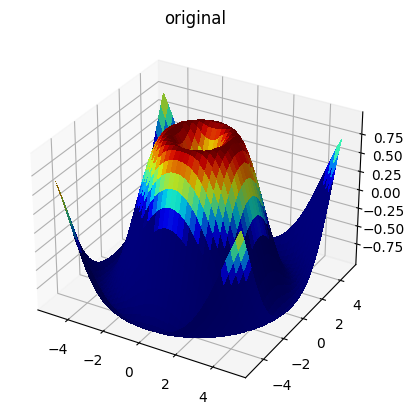

time elapsed: 85(s), time left: 4182(s), estimated finish time: 16:39:49
time elapsed: 169(s), time left: 4074(s), estimated finish time: 16:39:25
time elapsed: 254(s), time left: 3984(s), estimated finish time: 16:39:19
time elapsed: 340(s), time left: 3911(s), estimated finish time: 16:39:32
time elapsed: 424(s), time left: 3822(s), estimated finish time: 16:39:27
time elapsed: 510(s), time left: 3744(s), estimated finish time: 16:39:36
time elapsed: 596(s), time left: 3663(s), estimated finish time: 16:39:41
time elapsed: 682(s), time left: 3581(s), estimated finish time: 16:39:44
time elapsed: 766(s), time left: 3492(s), estimated finish time: 16:39:39
time elapsed: 851(s), time left: 3405(s), estimated finish time: 16:39:37
time elapsed: 936(s), time left: 3318(s), estimated finish time: 16:39:35
time elapsed: 1020(s), time left: 3232(s), estimated finish time: 16:39:33
time elapsed: 1106(s), time left: 3149(s), estimated finish time: 16:39:37
time elapsed: 1192(s), time left: 306

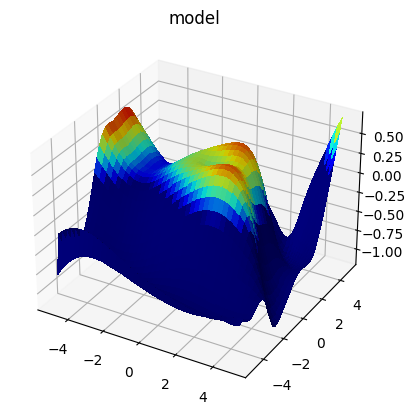

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xmesh, ymesh = np.meshgrid(np.arange(-5, 5.01, 0.25), np.arange(-5, 5.01, 0.25))
zmesh = np.sin(np.sqrt(xmesh*xmesh+ymesh*ymesh))
my_col = cm.jet(zmesh/np.amax(zmesh))

surf = ax.plot_surface(xmesh, ymesh, zmesh, rstride=1, cstride=1, facecolors = my_col,
        linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

plt.title("original")
plt.show()

def colvec(xdata):
    return np.reshape(xdata.ravel(), (-1, 1))

def rowvec(xdata):
    return np.reshape(xdata.ravel(), (1, -1))

def calcProcessTime(starttime, cur_iter, max_iter):

    telapsed = time.time() - starttime
    testimated = (telapsed/cur_iter)*(max_iter)

    finishtime = starttime + testimated
    finishtime = dt.datetime.fromtimestamp(finishtime).strftime("%H:%M:%S")  # in time

    lefttime = testimated-telapsed  # in seconds

    return (int(telapsed), int(lefttime), finishtime)



def sigmoid(xm):
    a=1/(1+np.exp(-xm))
    d=np.multiply(a,1-a)
    return a,d

def softplus(xm):
    a = np.log(1+np.exp(xm))
    d = 1/(1+np.exp(-xm))
    return a,d

def tanh(xm):
    a = np.tanh(xm)
    d = 1 - np.multiply(a,a)
    return a,d

nperceptron = 2
epochs = 50000
lr = .1

x = np.concatenate((colvec(xmesh), colvec(ymesh)), axis=1)
y = zmesh.ravel()

win = np.random.normal(0, 1, (x.shape[1], nperceptron))
bin = np.zeros(win.shape[1])
wout = np.random.normal(0, 1, (win.shape[1], 1))
bout = np.zeros(1)

yest = np.zeros(x.shape[0])

start = time.time()

for i in range(epochs):
    if (i+1) % 1000 == 0:
        prstime = calcProcessTime(start, i+1, epochs+1)
        print("time elapsed: %s(s), time left: %s(s), estimated finish time: %s" % prstime)

    for j in range(x.shape[0]):
        y0 = x[j,:] # forward, shape=[1,ncol(x)]
        y1 = np.dot(y0,win) + bin # first layer weight and bias
        y2, dy2 = sigmoid(y1) #  activation function and partial derivative
        yhat = np.dot(y2,wout) + bout # next set of weights and biases
        yactual = y[j]
        residual = yactual - yhat
        err = np.square(residual) # ssq loss function, SHAPE: [1,ncol(y)]
        yest[j] = yhat
        gerr = -2 * (residual) # gradient of square error
        gbout = gerr # gradient output bias
        gwout =  np.dot(colvec(y2), rowvec(gerr)) # gradient output weight
        gyhat = np.dot(rowvec(gerr), wout.T) # gradient output wout+bout layer
        gy2 = np.multiply(gyhat, dy2) # gradient perceptron
        gbin = gy2 # gradient input bias
        gwin = np.dot(colvec(y0), rowvec(gy2)) # gradient input weight
        win = win - lr * gwin # updates weights and biases by learning rate
        bin = bin - lr * gbin
        wout = wout - lr * gwout
        bout = bout - lr * gbout




zmeshhat = np.reshape(yest, (zmesh.shape[0], zmesh.shape[1]))
my_col = cm.jet(zmeshhat/np.amax(zmeshhat))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xmesh, ymesh, zmeshhat, rstride=1, cstride=1, facecolors = my_col,
        linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

plt.title("model")
plt.show()
